Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

## Strojno učenje 2016./2017.

<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

### Laboratorijska vježba 3: Stroj potpornih vektora i algoritam k-najbližih susjeda

(c) 2015-2016 Jan Šnajder, Domagoj Alagić

<i>Verzija: 0.2</i> <br/>
<i>Zadnji put ažurirano: 9. studenog 2016.</i> 

Objavljeno: **9. studenog 2016.**<br>
Rok za predaju: U terminu vježbe u tjednu od **14. studenog 2016.**

### Upute

Treća laboratorijska vježba sastoji se od sedam zadataka. Kako bi kvalitetnije, ali i na manje zamoran način usvojili gradivo ovog kolegija, potrudili smo se uključiti tri vrste zadataka: **1)** implementacija manjih algoritama, modela ili postupaka; **2)** eksperimenti s raznim modelima te njihovim hiperparametrima, te **3)** primjena modela na (stvarnim) podatcima. Ovim zadatcima pokrivamo dvije paradigme učenja: učenje izgradnjom (engl. *learning by building*) i učenje eksperimentiranjem (engl. *learning by experimenting*).

U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import mlutils
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
'''
Funkcija preuzeta iz "Bilježnica 8: Stroj potpornih vektora (SVM)" u svrhu koristelja plota s opcijom surfaces=False
kako bi na istom grafu mogla plotati podatke, decizijsku granicu i marginu
'''

def plot_problem(X, y, h=None, surfaces=True) :
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision boundaries (surfaces=False) or decision surfaces (surfaces=True)
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.02  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if shape(Z_test) == () :
                # h returns a scalar when applied to a matrix; map explicitly
                Z = sp.array(map(h,XX))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = sp.array(map(h,XX))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        if surfaces :
            plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)
        else :
            plt.contour(xx, yy, Z)
    # Plot the dataset
    scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.Paired,marker='o',s=50);

### 1. Klasifikator SVM

#### (a)

Upoznajte se s klasom [`svm.SVC`](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC), koja ustvari implementira sučelje prema implementaciji [`libsvm`](http://www.csie.ntu.edu.tw/~cjlin/libsvm/). Primijenite model `SVC` s linearnom jezgrenom funkcijom (tj. bez preslikavanja primjera u prostor značajki) na skup podataka `seven` (dan niže) s $N=7$ primjera. Ispišite koeficijente $w_0$ i $\mathbf{w}$. Ispišite dualne koeficijente i potporne vektore. Završno, koristeći funkciju `mlutils.plot_2d_svc_problem` iscrtajte podatke, decizijsku granicu i marginu. Funkcija prima podatke, oznake i klasifikator (objekt klase `SVC`). Izračunajte širinu margine.


w0 =  [ 3.99951172]

w =  [ -9.99707031e-01  -2.92968750e-04]

Dualni koeficijenti =  [ -4.99707031e-01  -1.46484375e-04   4.99853516e-01]

Potporni vektori = 
[[ 5.  2.]
 [ 5.  4.]
 [ 3.  2.]]

Sirina margine =  2.00058602331


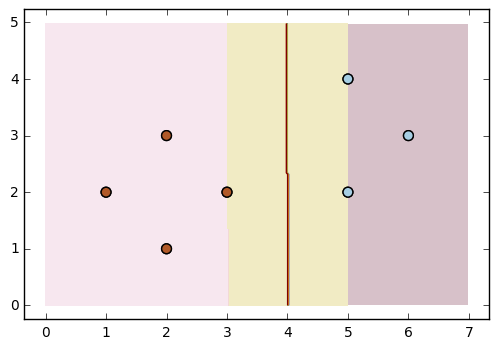

In [3]:
from sklearn.svm import SVC

seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, -1, -1, -1])

clf = SVC(kernel = 'linear').fit(seven_X, seven_y)

# w0
print '\nw0 = ', clf.intercept_
#w
print '\nw = ', clf.coef_[0]
# dualni koef
print '\nDualni koeficijenti = ', clf.dual_coef_[0]
# potporni vektori
print '\nPotporni vektori = \n', clf.support_vectors_
#predikcija
h1a = clf.predict
# Sirina margine = 2/ norma [w]
print '\nSirina margine = ', 2/norm(clf.coef_[0])

figure()
subplot(1,1,1)
mlutils.plot_2d_svc_problem(seven_X, seven_y, clf)
subplot(1,1,1)
plot_problem(seven_X, seven_y, h1a, surfaces = False)


**Q:** Koliko iznosi širina margine? <br>
**Q:** Koji primjeri su potporni vektori i zašto?

#### (b)

Definirajte funkciju `hinge(model, x, y)` koja izračunava gubitak zglobnice modela SVM (s linearnom jezgrom) na primjeru `x`. Izračunajte gubitke modela naučenog na skupu `seven` za primjere $\mathbf{x}^{(2)}=(3,2)$ i $\mathbf{x}^{(1)}=(3.5,2)$ koji su označeni pozitivno ($y=1$) te za $\mathbf{x}^{(3)}=(4,2)$ koji je označen negativno ($y=-1$). Također, izračunajte prosječni gubitak SVM-a na skupu `seven`. Uvjerite se da je rezultat identičan onome koji biste dobili primjenom ugrađene funkcije [`metrics.hinge_loss`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.hinge_loss.html).

In [4]:
from sklearn.metrics import hinge_loss

In [5]:
def hinge(model, x, y):
    return max(0, 1-y*model.decision_function(x));

X1b = np.array([[3,2], [3.5,2], [4,2]])
y1b = np.array([1, 1, -1])

for i in range(0, len(X1b)):
    print 'za x = ',X1b[i], ', y = ', y1b[i], ',  gubitak zglobnice = ', hinge(clf, X1b[i].reshape(1,-1), y1b[i])[0];
    
suma = 0
for i in range(0, len(seven_X)):
    suma += hinge(clf, seven_X[i].reshape(1,-1), seven_y[i])
    
print '\nProsjecan gubitak SVM-a na skupu seven koristeci funkciju:' 
print '\nhinge = ', (suma/len(seven_X))[0]
print 'hinge_loss = ', hinge_loss(seven_y, clf.decision_function(seven_X))


za x =  [ 3.  2.] , y =  1 ,  gubitak zglobnice =  0.000195312499999
za x =  [ 3.5  2. ] , y =  1 ,  gubitak zglobnice =  0.500048828125
za x =  [ 4.  2.] , y =  -1 ,  gubitak zglobnice =  1.00009765625

Prosjecan gubitak SVM-a na skupu seven koristeci funkciju:

hinge =  8.37053571429e-05
hinge_loss =  8.37053571429e-05


#### (c)

Vratit ćemo se na skupove podataka `outlier` ($N=8$) i `unsep` ($N=8$) iz prošle laboratorijske vježbe (dani niže) i pogledati kako se model SVM-a nosi s njima. Naučite ugrađeni model SVM-a (s linearnom jezgrom) na ovim podatcima i iscrtajte decizijsku granicu (skupa s marginom). Također ispišite točnost modela korištenjem funkcije [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).

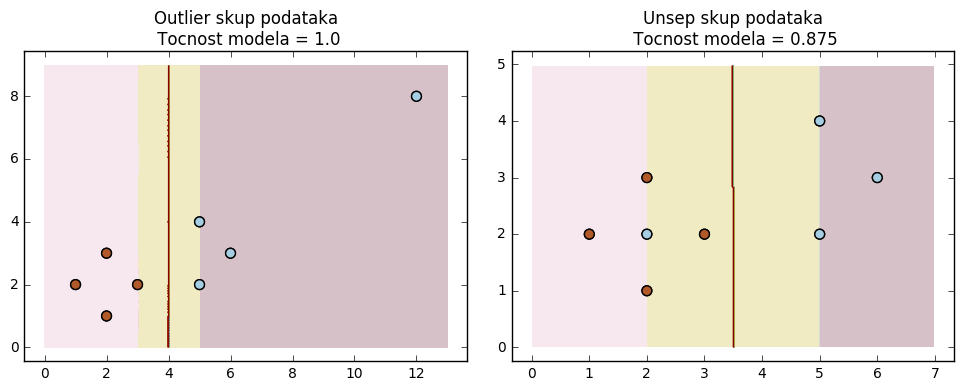

In [6]:
from sklearn.metrics import accuracy_score

figure(figsize(12, 4))
subplots_adjust(wspace=0.1)

####### OUTLIER #######
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, -1)

outlier = SVC(kernel = 'linear').fit(outlier_X, outlier_y)
h_out = outlier.predict
acc = accuracy_score(outlier_y, outlier.predict(outlier_X))

subplot(1,2,1)
mlutils.plot_2d_svc_problem(outlier_X, outlier_y, outlier)
plot_problem(outlier_X, outlier_y, h_out, surfaces = False)
title('Outlier skup podataka' + '\n Tocnost modela = ' + str(acc));

###### UNSEPARATED ######
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, -1)

unsep = SVC(kernel = 'linear').fit(unsep_X, unsep_y)
h_unsep = unsep.predict
acc = accuracy_score(unsep_y, outlier.predict(unsep_X))

subplot(1,2,2)
mlutils.plot_2d_svc_problem(unsep_X, unsep_y, unsep)
plot_problem(unsep_X, unsep_y, h_unsep, surfaces = False)
title('Unsep skup podataka' + '\n Tocnost modela = ' + str(acc));

In [7]:
# Vaš kôd ovdje...

**Q:** Zašto stršeća vrijednost ne utječe na SVM? <br>
**Q:** Kako se linearan SVM nosi s linearno neodvojivim skupom podataka? <br>
**Q:** Zašto SVM ipak uspjeva pronaći nekakvu granicu kod linearno neodvojivog problema, iako koristimo linearnu jezgru?

### 2. Nelinearan SVM

Ovaj zadatak pokazat će kako odabir jezgre utječe na kapacitet SVM-a. Na skupu `unsep` iz prošlog zadatka trenirajte tri modela SVM s različitim jezgrenim funkcijama: linearnom, polinomijalnom i radijalnom baznom (RBF) funkcijom. Varirajte parametar $C$ po vrijednostima $C\in\{10^{-2},1,10^2\}$, dok za ostale parametre (stupanj polinoma za polinomijalnu jezgru odnosno parametar $\gamma$ za jezgru RBF) koristite podrazumijevane vijednosti. Prikažite granice između klasa (i margine) na grafikonu organiziranome u polje $3x3$, gdje su stupci različite jezgre, a retci različite vrijednosti parametra $C$.

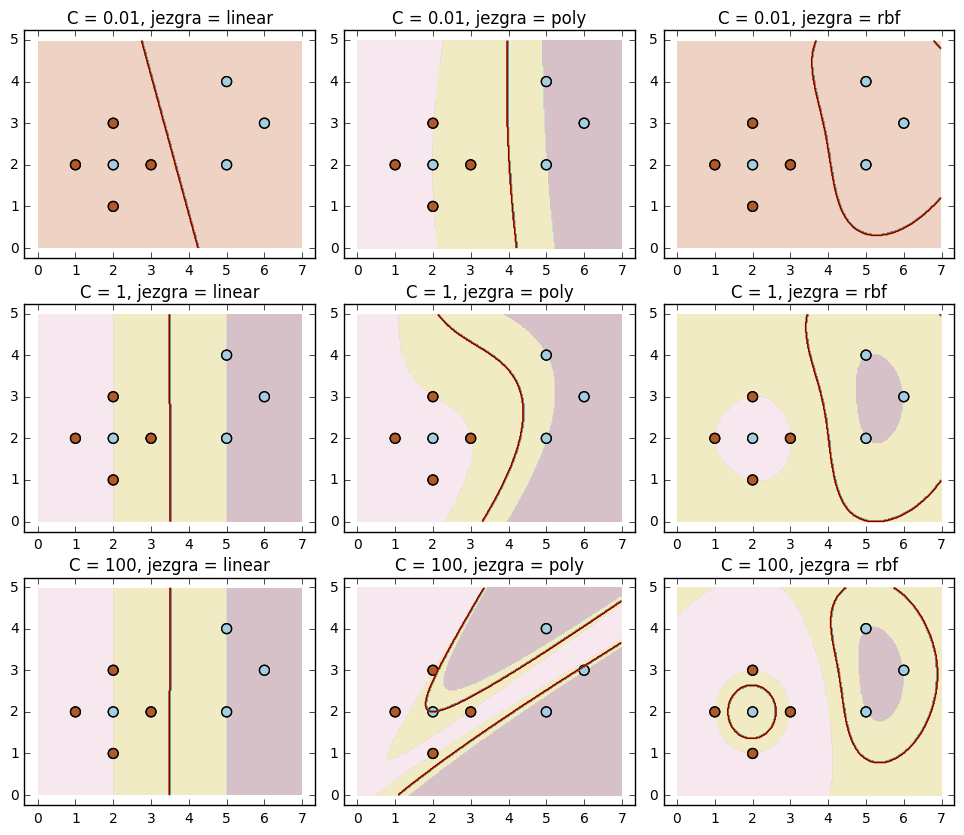

In [8]:
C = [10**(-2), 1, 10**2]
jezgra = ['linear', 'poly', 'rbf']
k = 1

figure(figsize(12, 10))
subplots_adjust(wspace=0.1, hspace = 0.2) 

for i in C:
    for j in jezgra:
        
        uns = SVC(C = i, kernel = j).fit(unsep_X, unsep_y)
        h = uns.predict

        subplot(3,3,k)
        mlutils.plot_2d_svc_problem(unsep_X, unsep_y, uns)
        plot_problem(unsep_X, unsep_y, h, surfaces = False)
        title('C = ' + str(i) + ', jezgra = ' + j);
    
        k+=1
        


### 3. Optimizacija hiperparametara SVM-a

Pored hiperparametra $C$, model SVM s jezgrenom funkcijom RBF ima i dodatni hiperparametar $\gamma=\frac{1}{2\sigma^2}$ (preciznost). Taj parametar također određuje složenost modela: velika vrijednost za $\gamma$ znači da će RBF biti uska, primjeri će biti preslikani u prostor u kojem su (prema skalarnome produktu) međusobno vrlo različiti, što će rezultirati složenijim modelima. Obrnuto, mala vrijednost za $\gamma$ znači da će RBF biti široka, primjeri će biti međusobno sličniji, što će rezultirati jednostavnijim modelima. To ujedno znači da, ako odabremo veći $\gamma$, trebamo jače regularizirati model, tj. trebamo odabrati manji $C$, kako bismo spriječili prenaučenost. Zbog toga je potrebno zajednički optimirati hiperparametre $C$ i $\gamma$, što se tipično radi iscrpnim pretraživanjem po rešetci (engl. *grid search*). Ovakav pristup primjenjuje se kod svih modela koji sadrže više od jednog hiperparametra.


#### (a)

Definirajte funkciju 

> `grid_search(X_train, X_validate, y_train, y_validate, (c1,c2), (g1,g2), error_surface=False)` 

koja optimizira parametre $C$ i $\gamma$ pretraživanjem po rešetci. Funkcija treba pretražiti parametre $C\in\{2^{c_1},2^{c_1+1},\dots,2^{c_2}\}$ i $\gamma\in\{2^{g_1},2^{g_1+1},\dots,2^{g_2}\}$. Funkcija treba vratiti optimalne parametre $(C^*,\gamma^*)$, tj. one za koje na skupu za provjeru model ostvaruju najmanju pogrešku. Dodatno, ako je `surface=True`, funkcija treba vratiti matrice (tipa `ndarray`) pogreške modela (očekivanje gubitka 0-1) na skupu za učenje i skupu za provjeru. Svaka je matrica dimenzija $(c_2-c_1+1)\times(g_2-g_1+1)$ (retci odgovaraju različitim vrijednostima za $C$, a stupci različitim vrijednostima za $\gamma$).

In [9]:
from sklearn.metrics import accuracy_score, zero_one_loss

def grid_search(X_train, X_validate, y_train, y_validate, (c1,c2), (g1,g2), error_surface=False) :
    
    c1c2 = []; g1g2 = [];
    for i in range(0, c2-c1+1):
        c1c2.append(c1+i)
    for i in range(0, g2-g1+1):
        g1g2.append(g1+i)
        
    C = []; gamma = [];
    for i in c1c2:
        C.append(2**i)
    for i in g1g2:
        gamma.append(2**i)
        
    err_train = 0; err_valid = 0; err_min = inf; 
    C_opt = 0; gamma_opt = 0;
    err_tr_ret = np.zeros(((c2-c1+1), (g2-g1+1)));
    err_val_ret = np.zeros(((c2-c1+1), (g2-g1+1)));
    
    for i in C:
        for j in gamma:
            
            model = SVC(C = i, gamma = j).fit(X_train, y_train)
            h_tr = model.predict(X_train)
            h_val = model.predict(X_validate)
            
            err_train = zero_one_loss(y_train, h_tr)
            err_valid = zero_one_loss(y_validate, h_val)
            
            if err_valid < err_min:
                err_min = err_valid
                C_opt = i
                gamma_opt = j
                
            err_tr_ret[C.index(i)][gamma.index(j)] = err_train
            err_val_ret[C.index(i)][gamma.index(j)] = err_valid
                
    
    if error_surface:
        return C_opt, gamma_opt, err_tr_ret, err_val_ret
    else:
        return C_opt, gamma_opt
    
            

#### (b)

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte **dva** skupa podataka od $N=200$ primjera: jedan s $n=2$ dimenzije i drugi s $n=1000$ dimenzija. Primjeri neka dolaze iz dviju klasa, s time da svakoj klasi odgovaraju dvije grupe (`n_clusters_per_class=2`), kako bi problem bio nešto složeniji, tj. nelinearniji. Neka sve značajke budu informativne. Podijelite skup primjera na skup za učenje i skup za ispitivanje u omjeru 1:1.

Na oba skupa optimirajte SVM s jezgrenom funkcijom RBF, u rešetci $C\in\{2^{-5},2^{-4},\dots,2^{15}\}$ i $\gamma\in\{2^{-15},2^{-14},\dots,2^{3}\}$. Prikažite površinu pogreške modela na skupu za učenje i skupu za provjeru, i to na oba skupa podataka (ukupno četiri grafikona) te ispišite optimalne kombinacije hiperparametara. Prikažite i granicu između klasa za dvodimenzijski skup. Za prikaz površine pogreške modela možete koristiti funkciju `plot_error_surface` iz paketa `mlutils`.

In [10]:
from sklearn.datasets import make_classification
from sklearn.cross_validation import train_test_split as TTS

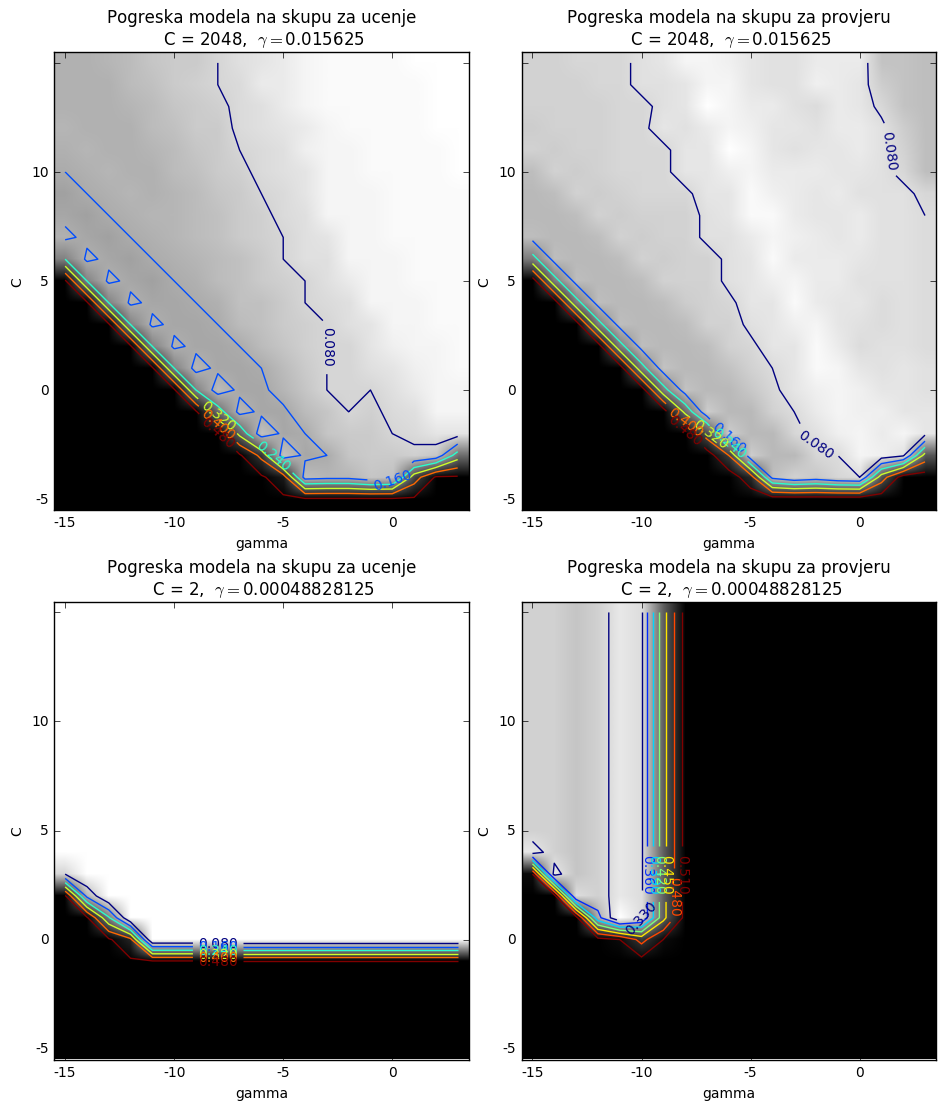

In [11]:
[X31, y31] = make_classification(n_samples=200, n_features=2, n_informative=2 , n_redundant=0, n_classes=2, n_clusters_per_class=2)
X31_train, X31_validate, y31_train, y31_validate = TTS(X31, y31, test_size = 0.5)

[X32, y32] = make_classification(n_samples=200, n_features=1000, n_informative=2, n_redundant=0, n_classes=2, n_clusters_per_class=2)
X32_train, X32_validate, y32_train, y32_validate = TTS(X32, y32, test_size = 0.5)

[C1_opt, g1_opt, tr_err1, val_err1] = grid_search(X31_train, X31_validate, y31_train, y31_validate, (-5,15), (-15,3), error_surface= True)
[C2_opt, g2_opt, tr_err2, val_err2] = grid_search(X32_train, X32_validate, y32_train, y32_validate, (-5,15), (-15,3), error_surface= True)

figure(figsize(12, 13))
subplots_adjust(wspace=0.01, hspace = 0.2) 
subplot(2,2,1)
mlutils.plot_error_surface(tr_err1, (-5,15), (-15,3))
title('Pogreska modela na skupu za ucenje' + '\n C = ' + str(C1_opt) + ',  $\gamma = $' + str(g1_opt));

subplot(2,2,2)
mlutils.plot_error_surface(val_err1, (-5,15), (-15,3))
title('Pogreska modela na skupu za provjeru' + '\n C = ' + str(C1_opt) + ',  $\gamma = $' + str(g1_opt));

subplot(2,2,3)
mlutils.plot_error_surface(tr_err2, (-5,15), (-15,3))
title('Pogreska modela na skupu za ucenje' + '\n C = ' + str(C2_opt) + ',  $\gamma = $' + str(g2_opt));

subplot(2,2,4)
mlutils.plot_error_surface(val_err2, (-5,15), (-15,3))
title('Pogreska modela na skupu za provjeru' + '\n C = ' + str(C2_opt) + ',  $\gamma = $' + str(g2_opt));


**Q:** Razlikuje li se površina pogreške na skupu za učenje i skupu za ispitivanje? Zašto? <br>
**Q:** U prikazu površine pogreške, koji dio površine odgovara prenaučenosti, a koji podnaučenosti? Zašto? <br>
**Q:** Kako broj dimenzija $n$ utječe na površinu pogreške, odnosno na optimalne hiperparametre $(C^*, \gamma^*)$? <br>
**Q:** Preporuka je da povećanje vrijednosti za $\gamma$ treba biti popraćeno smanjenjem vrijednosti za $C$. Govore li vaši rezultati u prilog toj preporuci? Obrazložite. <br>
**Q:** Podrazumijevana vrijednost parametara je $C=1$ i $\gamma=1/n$. Bi li te vrijednosti bile optimalne u ovom slučaju?

### 4. Utjecaj standardizacije značajki kod SVM-a

Za mnoge je modele bitno prije treniranja skalirati značajke, kako bi se spriječilo da značajke s većim numeričkim rasponima dominiraju nad onima s manjim numeričkim rasponima. To vrijedi i za SVM, kod kojega skaliranje nerijetko može znatno poboljšati rezultate. Svrha ovog zadataka jest eksperimentalno utvrditi utjecaj skaliranja značajki na točnost SVM-a.

Generirat ćemo dvoklasni skup od $N=500$ primjera s $n=2$ značajke, tako da je dimenzija $x_1$ većeg iznosa i većeg raspona od dimenzije $x_0$, te ćemo dodati jedan primjer koji vrijednošću značajke $x_1$ odskače od ostalih primjera:

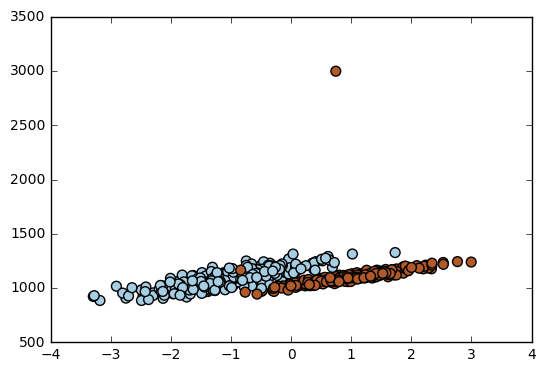

In [12]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500,n_features=2,n_classes=2,n_redundant=0,n_clusters_per_class=1)
X[:,1] = X[:,1]*100+1000
X[0,1] = 3000

figure(figsize(6.2, 4.2))
mlutils.plot_2d_svc_problem(X, y)

#### (a)

Proučite funkciju za iscrtavanje histograma [`hist`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist). Prikažite histograme vrijednosti značajki $x_0$ i $x_1$ (ovdje i u sljedećim zadatcima koristite `bins=50`).

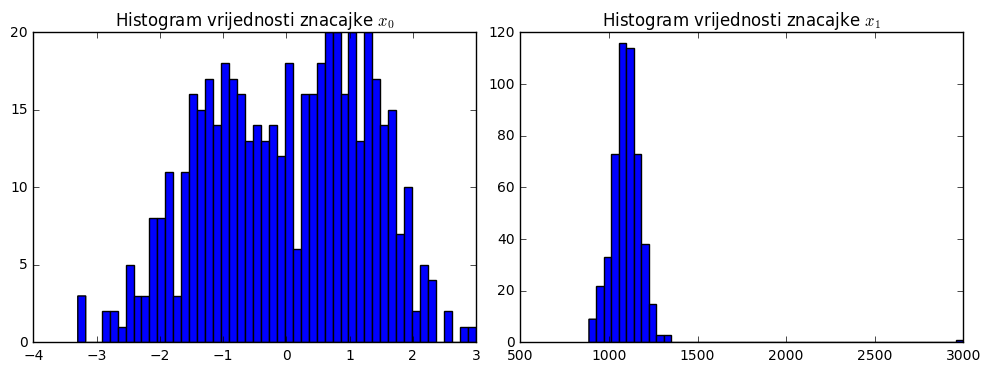

In [13]:
figure(figsize(12, 4))
subplots_adjust(wspace=0.1)
subplot(1,2,1)
hist(X[:,0], bins = 50); title('Histogram vrijednosti znacajke $x_0$');
subplot(1,2,2)
hist(X[:,1], bins = 50); title('Histogram vrijednosti znacajke $x_1$');

#### (b)

Proučite razred [`preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html). Prikažite histograme vrijednosti značajki $x_0$ i $x_1$ ako su iste skalirane min-max skaliranjem (ukupno dva histograma).

In [14]:
from sklearn.preprocessing import MinMaxScaler as MMS

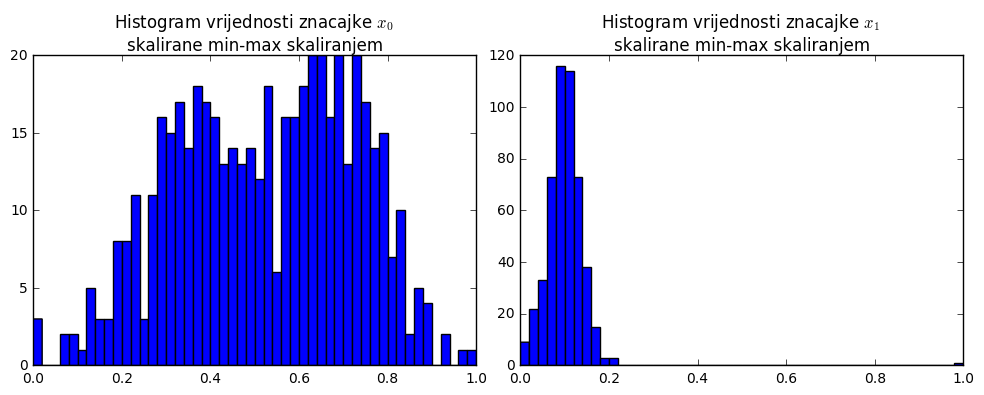

In [15]:
x0 = MMS().fit_transform(X[:,0].reshape(-1,1), y)
x1 = MMS().fit_transform(X[:,1].reshape(-1,1), y)

figure(figsize(12, 4))
subplots_adjust(wspace=0.1)
subplot(1,2,1)
hist(x0, bins = 50); title('Histogram vrijednosti znacajke $x_0$ \nskalirane min-max skaliranjem');
subplot(1,2,2)
hist(x1, bins = 50); title('Histogram vrijednosti znacajke $x_1$ \nskalirane min-max skaliranjem');

**Q:** Kako radi ovo skaliranje? <br>
**Q:** Dobiveni histogrami su vrlo slični. U čemu je razlika? <br>

#### (c)

Proučite razred [`preprocessing.StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Prikažite histograme vrijednosti značajki $x_0$ i $x_1$ ako su iste skalirane standardnim skaliranjem (ukupno dva histograma).

In [16]:
from sklearn.preprocessing import StandardScaler as SS

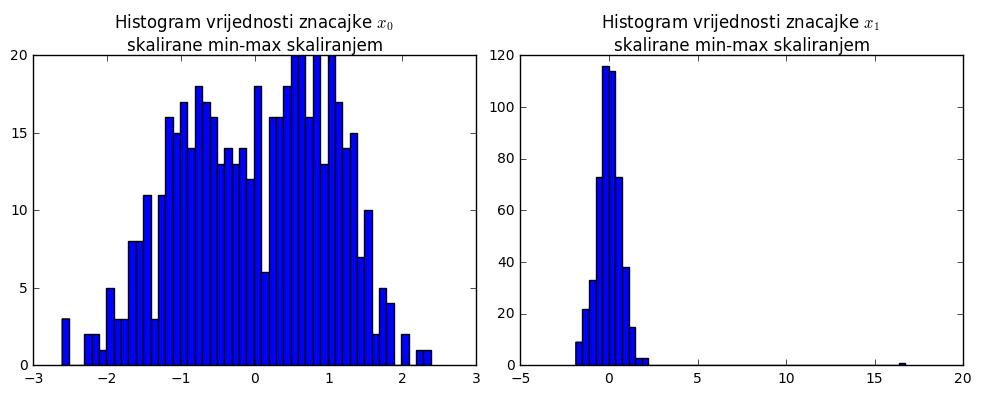

In [17]:
x0 = SS().fit_transform(X[:,0].reshape(-1,1), y)
x1 = SS().fit_transform(X[:,1].reshape(-1,1), y)

figure(figsize(12, 4))
subplots_adjust(wspace=0.1)
subplot(1,2,1)
hist(x0, bins = 50); title('Histogram vrijednosti znacajke $x_0$ \nskalirane min-max skaliranjem');
subplot(1,2,2)
hist(x1, bins = 50); title('Histogram vrijednosti znacajke $x_1$ \nskalirane min-max skaliranjem');

**Q:** Kako radi ovo skaliranje? <br>
**Q:** Dobiveni histogrami su vrlo slični. U čemu je razlika? <br>

#### (d)

Podijelite skup primjera na skup za učenje i skup za ispitivanje u omjeru 1:1. Trenirajte SVM s jezgrenom funkcijom RBF na skupu za učenje i ispitajte točnost modela na skupu za ispitivanje, koristeći tri varijante gornjeg skupa: neskalirane značajke, standardizirane značajke i min-max skaliranje. Koristite podrazumijevane vrijednosti za $C$ i $\gamma$. Izmjerite točnost svakog od triju modela na skupu za učenje i skupu za ispitivanje. Ponovite postupak više puta (npr. 30) te uprosječite rezultate (u svakom ponavljanju generirajte podatke kao što je dano na početku ovog zadatka).

**NB:** Na skupu za učenje treba najprije izračunati parametre skaliranja te zatim primijeniti skaliranje (funkcija `fit_transform`), dok na skupu za ispitivanje treba samo primijeniti skaliranje s parametrima koji su dobiveni na skupu za učenje (funkcija `transform`).

In [18]:
err_no_scale = []; err_std = []; err_minmax = [];

for i in range(0, 30):
    
    X_train, X_validate, y_train, y_validate = TTS(X, y, test_size = 0.5)
    
    model1 = SVC().fit(X_train, y_train)
    h1 = model1.predict(X_validate) # bez skaliranja
    err_no_scale.append(accuracy_score(y_validate, h1))
    
    std_scale = SS()
    X_std_train = std_scale.fit_transform(X_train) # skaliranje podataka za ucenje
    X_std_valid = std_scale.transform(X_validate) # skaliranje podataka za ispitivanje
    model2 = SVC().fit(X_std_train, y_train) # treniranje SVM na skaliranom skupu za ucenje
    h2 = model2.predict(X_std_valid)
    err_std.append(accuracy_score(y_validate, h2))
    
    minmax_scale = MMS()
    X_minmax_train = minmax_scale.fit_transform(X_train) 
    X_minmax_valid = minmax_scale.transform(X_validate) 
    model3 = SVC().fit(X_minmax_train, y_train) 
    h3 = model3.predict(X_minmax_valid)
    err_minmax.append(accuracy_score(y_validate, h3))

print '\nProsjecna tocnost modela uz:\n'
print '          Neskalirane znacajke = ', mean(err_no_scale)
print '          Standardizirane znacajke = ', mean(err_std)
print '          Min-max skaliranje = ', mean(err_minmax)


Prosjecna tocnost modela uz:

          Neskalirane znacajke =  0.840533333333
          Standardizirane znacajke =  0.985466666667
          Min-max skaliranje =  0.9616


**Q:** Jesu li rezultati očekivani? Obrazložite. <br>
**Q:** Bi li bilo dobro kada bismo funkciju `fit_transform` primijenili na cijelom skupu podataka? Zašto? Bi li bilo dobro kada bismo tu funkciju primijenili zasebno na skupu za učenje i zasebno na skupu za ispitivanje? Zašto?

### 5. k-najbližih susjeda

U ovom zadatku promatrat ćemo jednostavan klasifikacijski model imena **algoritam k-najbližih susjeda**. Najprije ćete ga samostalno isprogramirati kako biste se detaljno upoznali s radom ovog modela, a zatim ćete prijeći na analizu njegovih hiperparametara (koristeći ugrađeni razred, zbog efikasnosti).

#### (a)

Implementirajte klasu `KNN` koja implementira algoritam $k$ najbližih susjeda. Neobavezan parametar konstruktora jest broj susjeda `n_neighbours` ($k$), čija je podrazumijevana vrijednost 3. Definirajte metode `fit(X, y)` i `predict(X)`, koje služe za učenje modela odnosno predikciju. Kao mjeru udaljenosti koristite euklidsku udaljenost ([`scipy.linalg.norm`](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.norm.html); pripazite na parametar `axis`). Nije potrebno implementirati nikakvu težinsku funkciju.

In [19]:
from scipy.linalg import norm
from bisect import insort

class KNN:
    def __init__(self, n_neighbors=3):
        self.n_neighbors = n_neighbors
        self.D = []
        
    def fit(self, X_train, y_train):
        for x,y in zip(X_train, y_train):
            self.D.append([x, y])
        return self.D
        
    def predict(self, X_test):
        pred = [];
        for x in X_test:
            dist = []; y = []; cnt = [];
            for xD, yD in self.D:
                dist.append(norm(x-xD))
                y.append(yD)
                
            dat = sorted(zip(dist, y))[0:self.n_neighbors]
            
            for i in range(0, self.n_neighbors):
                cnt.append(dat[i][1])
            
            pred.append((Counter(cnt).most_common()[0])[0])
            
        return pred
            
    

#### (b)

Kako biste se uvjerili da je Vaša implementacija ispravna, usporedite ju s ugrađenom implementacijom u razredu [`neighbors.KNeighborsClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). Budući da spomenuti razred koristi razne optimizacijske trikove pri pronalasku najboljih susjeda, obavezno postavite parametar `algorithm=brute`, jer bi se u protivnom moglo dogoditi da Vam se predikcije razlikuju. Usporedite modele na sljedećem (umjetnom) skupu podataka:

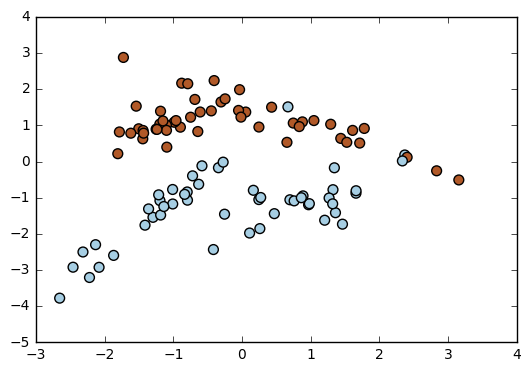

In [20]:
from sklearn.datasets import make_classification
from collections import Counter
X_art, y_art = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=2)

figure(figsize(6.2, 4.2))
mlutils.plot_2d_clf_problem(X_art, y_art)


In [21]:
from sklearn.neighbors import KNeighborsClassifier as KNC

#vlastita implementacija
knn = KNN()
knn.fit(X_art, y_art)
h1 = knn.predict(X_art)

#ugradjena implementacija
implementirana = KNC(algorithm = 'brute', n_neighbors = 3).fit(X_art, y_art)
h2 = implementirana.predict(X_art)

print 'Razlika izmedju vlastite implementacije i ugradene implementacije = ', norm(h1 - h2)


Razlika izmedju vlastite implementacije i ugradene implementacije =  0.0


#### (c)

Pomoću funkcije `mlutils.plot_2d_clf_problem` iscrtajte prostor primjera i područja koja odgovaraju prvoj odnosno drugoj klasi. Eksperimentirajte s različitim vrijednostima za broj primjera $N$, broj susjeda $k$ i broj klasa $K$.

**NB:** Implementacija algoritma `KNeighborsClassifier` iz sklearna vjerojatno će raditi brže od Vaše implementacije, pa koristite nju za iscrtavanje grafa. Naime, za iscrtavanje grafa potrebno je napraviti predikciju za svaku točku u regiji iscrtavanja.

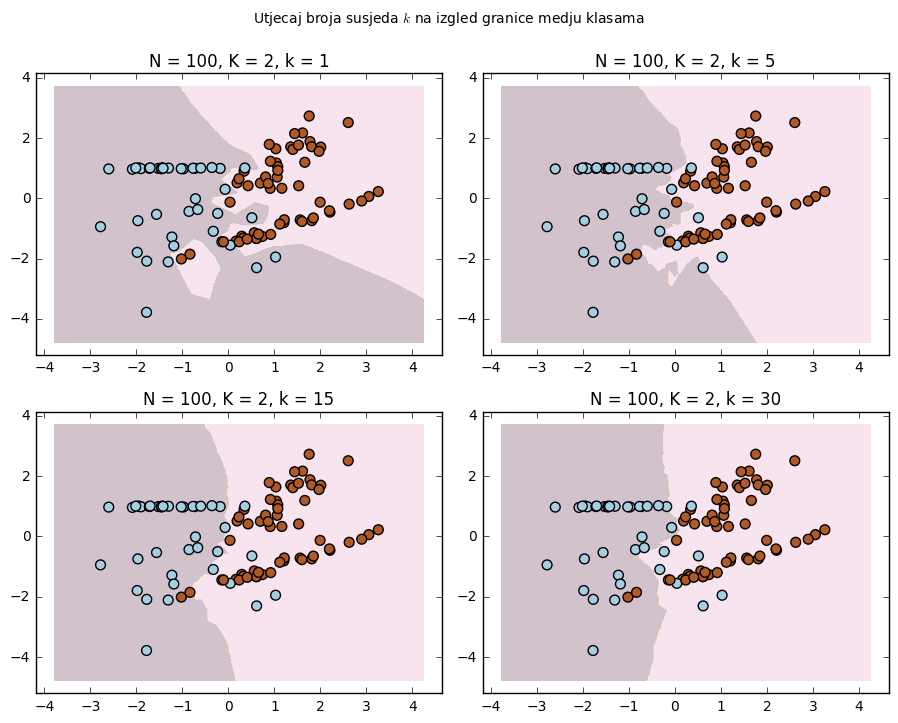

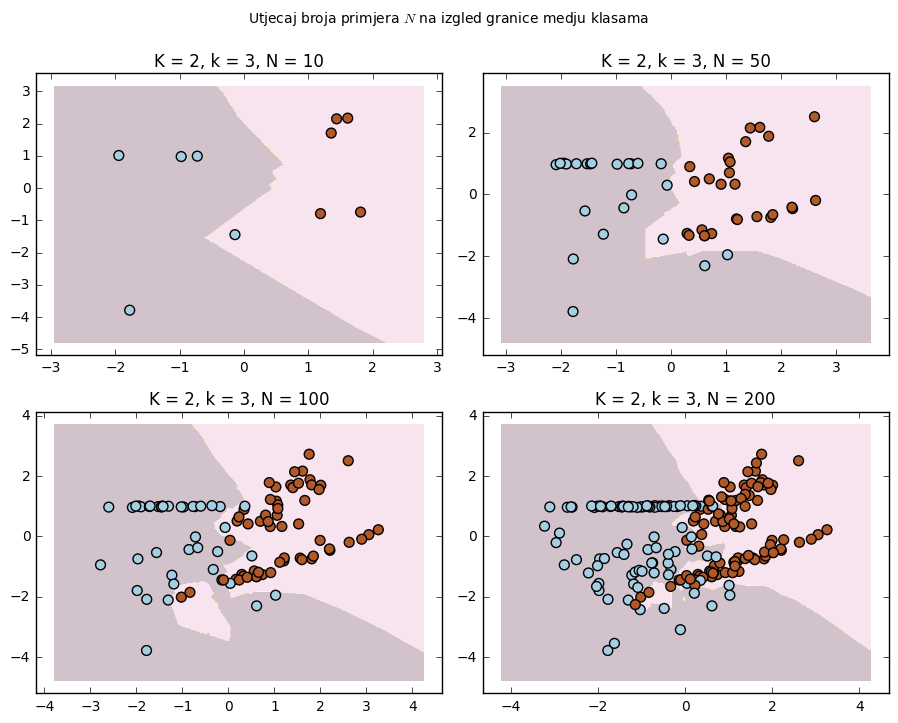

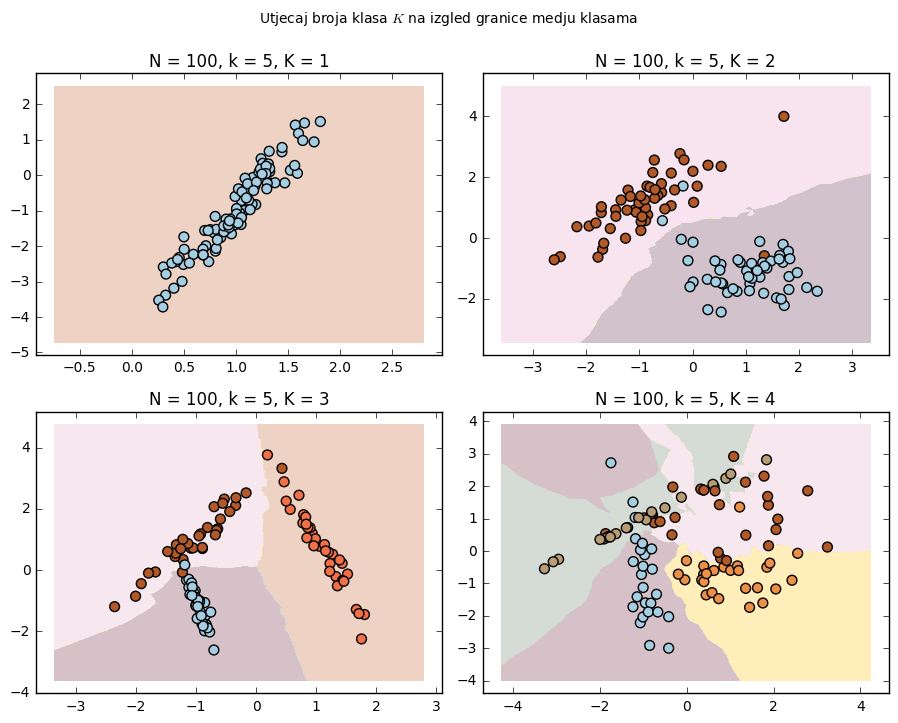

In [22]:
K = [1, 5, 15, 30]
N = [10, 50, 100, 200]
kl = [1, 2, 3, 4]

X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=2)
X5 = [X[0:10,:], X[0:50,:], X[0:100,:], X]
y5 = [y[0:10], y[0:50], y[0:100], y]

figure(figsize(11, 8))
suptitle('Utjecaj broja susjeda $k$ na izgled granice medju klasama')
subplots_adjust(wspace=0.1)

### UTJECAJ BROJA SUSJEDA ###
i = 1
for k in K:
    mod = KNC(algorithm = 'brute', n_neighbors = k).fit(X5[2], y5[2])
    h = mod.predict
    
    subplot(2,2,i)
    mlutils.plot_2d_clf_problem(X5[2], y5[2], h)
    title('N = '+ str(100) + ', K = ' + str(2) + ', k = ' + str(k))
    i+=1
    
print '  \n\n'

### UTJECAJ BROJA PRIMJERA ###    
figure(figsize(11, 8))
suptitle('Utjecaj broja primjera $N$ na izgled granice medju klasama')
subplots_adjust(wspace=0.1)

j = 1
for i in range(0, len(X5)):
    mod = KNC(algorithm = 'brute', n_neighbors = 3).fit(X5[i], y5[i])
    h = mod.predict
    
    subplot(2,2,j)
    mlutils.plot_2d_clf_problem(X5[i], y5[i], h)
    title('K = ' + str(2) + ', k = ' + str(3) + ', N = '+ str(N[i]))
    j+=1
    
### UTJECAJ BROJA KLASA ###
figure(figsize(11, 8))
suptitle('Utjecaj broja klasa $K$ na izgled granice medju klasama')
subplots_adjust(wspace=0.1)

i = 1
for k in kl:
    X, y = make_classification(n_samples=100, n_features=2, n_classes=k, n_redundant=0, n_clusters_per_class=1)
    mod = KNC(algorithm = 'brute', n_neighbors = 5).fit(X, y)
    h = mod.predict
    
    subplot(2,2,i)
    mlutils.plot_2d_clf_problem(X, y, h)
    title('N = '+ str(100) + ', k = ' + str(5) + ', K = ' + str(k) )
    i+=1


**Q:** Kako $k$ utječe na izgled granice između klasa? A broj primjera $N$?

### 6. Analiza algoritma k-najbližih susjeda

Algoritam k-nn ima hiperparametar $k$ (broj susjeda). Taj hiperparametar izravno utječe na složenost algoritma, pa je stoga izrazito važno dobro odabrati njegovu vrijednost. Kao i kod mnogih drugih algoritama, tako i kod algoritma k-nn optimalna vrijednost hiperametra $k$ ovisi o konkretnom problemu, uključivo broju primjera $N$, broju značajki (dimenzija) $n$ te broju klasa $K$.

#### (a)

Kako bismo dobili pouzdanije rezultate, potrebno je mjerenja ponoviti na različitim skupovima podataka i zatim uprosječiti dobivene vrijednosti pogrešaka. Definirajte funkciju

> `knn_eval(n_instances=100, n_features=2, n_classes=2, n_informative=2, test_size=0.3, k_range=(1, 20), n_trials=100)`

koja trenira i ispituje model k-nn na ukupno `n_instances` primjera, i to tako da za svaku vrijednost hiperparametra iz zadanog intervala `k_range` ponovi `n_trials` mjerenja, generirajući za svako od njih nov skup podataka pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) i dijeleći ga na skup za učenje i skup za ispitivanje koristeći funkciju [`sklearn.cross_validation.train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html). Udio skupa za ispitivanje definiran je parametrom `test_size`. Vrijednosti parametara `n_instances`, `n_features`, `n_classes` i `n_informative` proslijedite funkciji `make_classification` te dodatno postavite `n_redundant=0` i `n_clusters_per_class=1`. Povratne vrijednosti funkcije jest trojka `(best_k, train_errors, test_errors)`. Vrijednost `best_k` je optimalna vrijednost hiperparametra $k$ (vrijednost za koju je pogreška na skupu za ispitivanje najmanja). Vrijednosti `train_errors` i `test_errors`  liste su pogrešaka na skupu za učenja odnosno skupu za testiranje za sve razmatrane vrijednosti hiperparametra $k$.

In [23]:
from sklearn.cross_validation import train_test_split as TTS

def knn_eval(n_instances=100, n_features=2, n_classes=2, n_informative=2, test_size=0.3, k_range=(1, 20), n_trials=100):
    
    best_k = 0; train_errors = []; test_errors = [];
    
    for k in range(k_range[0],k_range[1]+1):
        
        tr_err = []; tst_err = [];
        for j in range(0, n_trials):
            
            X, y = make_classification(n_samples=n_instances, n_features=n_features, n_classes=n_classes, n_informative=n_informative, n_redundant=0, n_clusters_per_class=1)
            X_tr, X_tst, y_tr, y_tst = TTS(X, y, test_size = test_size)
            
            mod = KNC(algorithm = 'brute', n_neighbors = k).fit(X_tr, y_tr)
            h_tr = mod.predict(X_tr)
            h_tst = mod.predict(X_tst)
            
            tr_err.append(zero_one_loss(y_tr, h_tr))
            tst_err.append(zero_one_loss(y_tst, h_tst))
            
        train_errors.append(mean(tr_err))
        test_errors.append(mean(tst_err))
        
    best_k = k_range[0] + test_errors.index(min(test_errors))
    
    return (best_k, train_errors, test_errors)
        

#### (b)

Pomoću funkcije `knn_eval` iz (a) dijela zadatka, iscrtajte pogrešku učenja i ispitivanja kao funkcije hiperparametra $k$, $k\in\{1,\dots,20\}$, za $N=200$ primjera. Ispišite i optimalnu vrijednost za $k$.


Optimalna vrijednost parametra k =  18


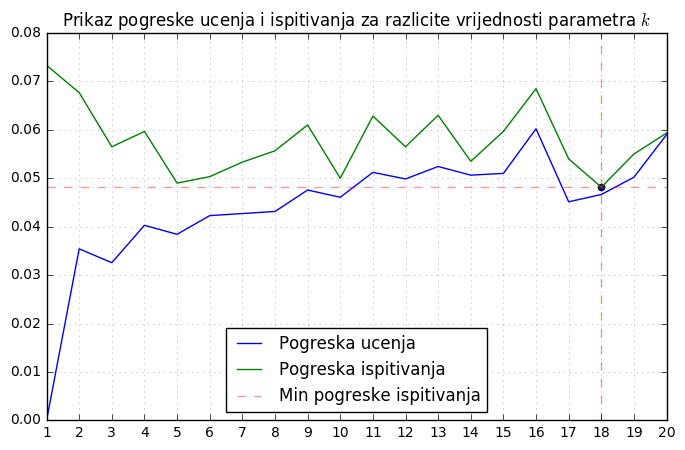

In [24]:
[k, err_tr, err_tst] = knn_eval(n_instances=200, k_range=(1, 20))
rng = range(1, 21)

print '\nOptimalna vrijednost parametra k = ', k

figure(figsize(8, 5))
plot(np.array(range(1,21)), err_tr)
plot(np.array(range(1,21)), err_tst)
scatter(k,err_tst[rng.index(k)])
ylim(0,0.08); xlim(1, 20);
axvline(k, color = 'r', linestyle = '--', alpha = 0.4)
axhline(err_tst[rng.index(k)], color = 'r', linestyle = '--', alpha = 0.4)
legend(['Pogreska ucenja', 'Pogreska ispitivanja', 'Min pogreske ispitivanja'], loc = 'best')
title('Prikaz pogreske ucenja i ispitivanja za razlicite vrijednosti parametra $k$')
xticks(rng)
grid(alpha = 0.3)

**Q:** Kojem području odgovara prenaučenost, a kojem podnaučenost modela? Zašto? <br>
**Q:** Je li uvijek moguće doseći pogrešku od 0 na skupu za učenje?

#### (c)

Pomoću funkcije `knn_eval` iz (a) dijela zadatka, iscrtajte pogreške učenja i ispitivanja kao funkcije hiperparametra $k$, $k\in\{1,\dots,20\}$, za $N=\{100, 500, 1000, 3000\}$ primjera. Načinite 4 zasebna grafikona (generirajte ih u 2x2 polju). U svakoj iteraciji ispišite optimalnu vrijednost hiperparametra $k$ (najlakše kao naslov grafikona).

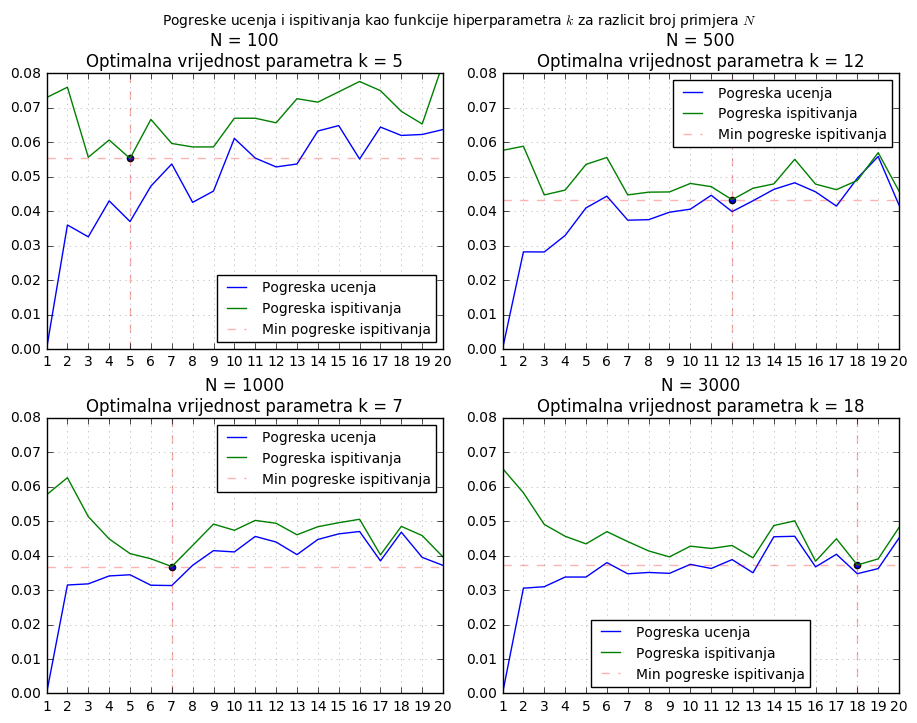

In [25]:
rng = range(1, 21)
N = [100, 500, 1000, 3000]

figure(figsize(11, 8))
suptitle('Pogreske ucenja i ispitivanja kao funkcije hiperparametra $k$ za razlicit broj primjera $N$\n')
subplots_adjust(wspace=0.15, hspace = 0.25)

i = 1
for n in N:
    [k, err_tr, err_tst] = knn_eval(n_instances=n, k_range=(1, 20))
    
    subplot(2,2,i)
    plot(np.array(range(1,21)), err_tr)
    plot(np.array(range(1,21)), err_tst)
    scatter(k,err_tst[rng.index(k)])
    ylim(0,0.08); xlim(1, 20);
    axvline(k, color = 'r', linestyle = '--', alpha = 0.3)
    axhline(err_tst[rng.index(k)], color = 'r', linestyle = '--', alpha = 0.3)
    legend(['Pogreska ucenja', 'Pogreska ispitivanja', 'Min pogreske ispitivanja'], loc = 'best', prop={'size':10})
    title('\nN = ' + str(n) + '\nOptimalna vrijednost parametra k = ' + str(k))
    xticks(rng)
    grid(alpha = 0.3)
    
    i+=1

### 7. Nerobusnost algoritma k-nn

Svrha ovog zadatka jest analizirati u kojoj je mjeri algoritam k-nn osjetljiv na razlike u mjernoj skali između pojedinih dimenzija te na prisutnost nebitnih značajki.

#### (a)

Krenite od umjetnog skupa podataka danog u nastavku. Zatim napravite kopiju tog skupa podataka (pogledajte [`copy.deepcopy`](https://docs.python.org/2/library/copy.html#copy.deepcopy)) i preinačite ju tako da jednu dimenziju pomnožite sa 100. Oba skupa podijelite na skup za učenje i skup za ispitivanje u omjeru 7:3, pri čemu obratite pozornost na to da oba skupa podijelite na identičan način. Trenirajte modele k-nn na skaliranoj i neskaliranoj inačici skupa za učenje (s pretpostavljenim parametrima), a zatim ispitajte model na odgovarajućim ispitnim inačicama skupova.

In [26]:
from copy import deepcopy
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=2)

XX = deepcopy(X); XX[:,1] *= 100; yy = deepcopy(y);

X_tr, X_tst, y_tr, y_tst = TTS(X, y, test_size = 0.3, random_state = 42)
XX_tr, XX_tst, yy_tr, yy_tst = TTS(XX, yy, test_size = 0.3, random_state = 42)

neskal = KNC(algorithm = 'brute', n_neighbors = 5).fit(X_tr, y_tr)
h_tst_neskal = neskal.predict(X_tst)

skal = KNC(algorithm = 'brute', n_neighbors = 5).fit(XX_tr, yy_tr)
h_tst_skal = skal.predict(XX_tst)

print '\nPogreska modela: \n'
print '       Neskaliranog modela = ', zero_one_loss(y_tst, h_tst_neskal)
print '       Skaliranog modela: ', zero_one_loss(y_tst, h_tst_skal)

print '\nOdnosno tocnost modela: \n'
print '       Neskaliranog modela: ', 100*accuracy_score(y_tst, h_tst_neskal), '%'
print '       Skaliranog modela: ', 100*accuracy_score(y_tst, h_tst_skal), '%'


Pogreska modela: 

       Neskaliranog modela =  0.1
       Skaliranog modela:  0.35

Odnosno tocnost modela: 

       Neskaliranog modela:  90.0 %
       Skaliranog modela:  65.0 %


**Q:** Zašto je ovaj problem tako izražen kod algoritma k-nn?

#### (b)

Kako bismo provjerili u kojoj je mjeri algoritam k-nn osjetljiv na prisustvo nebitnih značajki, možemo iskoristiti funkciju `make_classification` kako bismo generirali skup primjera kojemu su neke od značajki nebitne. Naime, parametar `n_informative` određuje broj bitnih značajki, dok parametar `n_features` određuje ukupan broj značajki. Ako je `n_features > n_informative`, onda će neke od značajki biti nebitne. Umjesto da izravno upotrijebimo funkciju `make_classification`, upotrijebit ćemo funkciju `knn_eval` iz zadatka (7a), jer ćemo na taj način dobiti pouzdanije procjene.

Koristite funkciju `knn_eval` na dva načina. U oba koristite $N=1000$ primjera, $n=10$ značajki i $K=5$ klasa, ali za prvi neka su svih 10 značajki bitne, a za drugi neka je bitno samo 5 od 10 značajki. Ispišite pogreške učenja i ispitivanja za oba modela za optimalnu vrijednost $k$ (vrijednost za koju je ispitna pogreška najmanja).

In [27]:
rng = range(1, 21)

[k, err_tr, err_tst] = knn_eval(n_instances=1000, n_features=10, n_classes=5, n_informative=10)

print '\nBroj bitnih znacajki = 10\n'
print '      Optimalna vrijednost parametra k = ', k
print '      Pogreska ucenja za optimalan k = ', err_tr[rng.index(k)]
print '      Pogreska ispitivanja za optimalan k = ', err_tst[rng.index(k)]

[k, err_tr, err_tst] = knn_eval(n_instances=1000, n_features=10, n_classes=5, n_informative=5)

print '\nBroj bitnih znacajki = 5\n'
print '      Optimalna vrijednost parametra k = ', k
print '      Pogreska ucenja za optimalan k = ', err_tr[rng.index(k)]
print '      Pogreska ispitivanja za optimalan k = ', err_tst[rng.index(k)]
print ''



Broj bitnih znacajki = 10

      Optimalna vrijednost parametra k =  5
      Pogreska ucenja za optimalan k =  0.0800571428571
      Pogreska ispitivanja za optimalan k =  0.129233333333

Broj bitnih znacajki = 5

      Optimalna vrijednost parametra k =  14
      Pogreska ucenja za optimalan k =  0.162
      Pogreska ispitivanja za optimalan k =  0.201333333333



**Q:** Zašto nebitne značajke ovoliko utječu na perfomanse modela?